<a href="https://colab.research.google.com/github/tamnhu2913/Bristish-Airways-Data-Science/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from bs4 import BeautifulSoup
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set(color_codes=True, context="notebook", style='whitegrid', palette="tab20")
cmap = sns.color_palette("tab20")

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Download Data

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
stars = []
date = []
country = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Get reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    #Get stars
    for para in parsed_content.find_all("div", {"class": "rating-10"}):
      try:
        star = para.span.text
        if '\n' not in star:
          stars.append(star)
      except:
        print(f"Error on page {i}")
        stars.append("None")


    #Get date
    for para in parsed_content.find_all("time"):
        date.append(para.text)

    #Get country
    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.text.strip(" ()"))

print("Total reviews: {} \t N. of stars: {} \t N. of date: {} \t Total country: {}".format(len(reviews), len(stars), len(date), len(country)))

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Total reviews: 1000 	 N. of stars: 1000 	 N. of date: 1000 	 Total country: 1000


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df["stars"] = stars
df["date"] = date
df["country"] = country
df.head(5)

,reviews,stars,date,country
0,Not Verified | We bought tickets for a Geneva-...,1,22nd October 2024,Switzerland
1,✅ Trip Verified | Appalling service with fai...,1,14th October 2024,South Africa
2,✅ Trip Verified | British Airways charge you f...,6,12th October 2024,United Kingdom
3,✅ Trip Verified | What is wrong with you guys?...,1,12th October 2024,Germany
4,✅ Trip Verified | We booked two business cla...,2,12th October 2024,United States


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
 1   stars    1000 non-null   object
 2   date     1000 non-null   object
 3   country  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [ ]:
df.to_csv("/content/BA_reviews.csv")

# Data Cleaner

In [ ]:
data = df.copy()

## Add new column 'verified'

In [ ]:
data['verified'] = data['reviews'].str.contains('Trip Verified')
data

,reviews,stars,date,country,verified
0,Not Verified | We bought tickets for a Geneva-...,1,22nd October 2024,Switzerland,False
1,✅ Trip Verified | Appalling service with fai...,1,14th October 2024,South Africa,True
2,✅ Trip Verified | British Airways charge you f...,6,12th October 2024,United Kingdom,True
3,✅ Trip Verified | What is wrong with you guys?...,1,12th October 2024,Germany,True
4,✅ Trip Verified | We booked two business cla...,2,12th October 2024,United States,True
...,...,...,...,...,...
995,✅ Trip Verified | Johannesburg to Cape Town re...,8,29th July 2019,Thailand,True
996,✅ Trip Verified | Grenada to Gatwick. Having ...,5,28th July 2019,United Kingdom,True
997,✅ Trip Verified | Prague to London. A two hou...,1,27th July 2019,United Kingdom,True
998,✅ Trip Verified | London to Dubai. Lately I a...,10,24th July 2019,United Arab Emirates,True


## Change type of 'stars' and 'date

In [ ]:
data['stars'] = data['stars'].astype(int)

In [ ]:
data['date'] = data['date'].apply(lambda x: re.sub(r'(\d+)(st|nd|rd|th)', r'\1',x))
data['date'] = data['date'].apply(pd.to_datetime, format='%d %B %Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   1000 non-null   object        
 1   stars     1000 non-null   int64         
 2   date      1000 non-null   datetime64[ns]
 3   country   1000 non-null   object        
 4   verified  1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 32.4+ KB


## Removing the symbol " | "

In [ ]:
data['reviews'] = data['reviews'].str.split('|', expand=True)[1]
data

,reviews,stars,date,country,verified
0,"We bought tickets for a Geneva-London flight,...",1,2024-10-22,Switzerland,False
1,Appalling service with failing defective fl...,1,2024-10-14,South Africa,True
2,British Airways charge you for the pleasure o...,6,2024-10-12,United Kingdom,True
3,What is wrong with you guys? People pay lots ...,1,2024-10-12,Germany,True
4,We booked two business class seat with Brit...,2,2024-10-12,United States,True
...,...,...,...,...,...
995,Johannesburg to Cape Town return. This flight...,8,2019-07-29,Thailand,True
996,Grenada to Gatwick. Having flown with BA on ...,5,2019-07-28,United Kingdom,True
997,Prague to London. A two hour flight on 27th ...,1,2019-07-27,United Kingdom,True
998,London to Dubai. Lately I am frequently flyi...,10,2019-07-24,United Arab Emirates,True


## Remove the specifial character

In [ ]:
data['reviews'] = data['reviews'].str.replace(r'[^A-Za-z\s\d]+', '', regex = True)
data

,reviews,stars,date,country,verified
0,We bought tickets for a GenevaLondon flight b...,1,2024-10-22,Switzerland,False
1,Appalling service with failing defective fl...,1,2024-10-14,South Africa,True
2,British Airways charge you for the pleasure o...,6,2024-10-12,United Kingdom,True
3,What is wrong with you guys People pay lots o...,1,2024-10-12,Germany,True
4,We booked two business class seat with Brit...,2,2024-10-12,United States,True
...,...,...,...,...,...
995,Johannesburg to Cape Town return This flight ...,8,2019-07-29,Thailand,True
996,Grenada to Gatwick Having flown with BA on t...,5,2019-07-28,United Kingdom,True
997,Prague to London A two hour flight on 27th J...,1,2019-07-27,United Kingdom,True
998,London to Dubai Lately I am frequently flyin...,10,2019-07-24,United Arab Emirates,True


## Removing whitespace

In [ ]:
data['reviews'] = data['reviews'].str.strip()

## Lower Case

In [ ]:
data['reviews'] = data['reviews'].str.lower()
data

,reviews,stars,date,country,verified
0,we bought tickets for a genevalondon flight bu...,1,2024-10-22,Switzerland,False
1,appalling service with failing defective fleet...,1,2024-10-14,South Africa,True
2,british airways charge you for the pleasure of...,6,2024-10-12,United Kingdom,True
3,what is wrong with you guys people pay lots of...,1,2024-10-12,Germany,True
4,we booked two business class seat with british...,2,2024-10-12,United States,True
...,...,...,...,...,...
995,johannesburg to cape town return this flight w...,8,2019-07-29,Thailand,True
996,grenada to gatwick having flown with ba on thi...,5,2019-07-28,United Kingdom,True
997,prague to london a two hour flight on 27th jul...,1,2019-07-27,United Kingdom,True
998,london to dubai lately i am frequently flying ...,10,2019-07-24,United Arab Emirates,True


## Removing Stopwords and Lemmatization

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    lem = WordNetLemmatizer()
    words = word_tokenize(text)
    fitered = [lem.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(fitered)

data['reviews'] = data['reviews'].apply(remove_stopwords)
data

,reviews,stars,date,country,verified
0,bought ticket genevalondon flight got airport ...,1,2024-10-22,Switzerland,False
1,appalling service failing defective fleet a380...,1,2024-10-14,South Africa,True
2,british airway charge pleasure choosing seat p...,6,2024-10-12,United Kingdom,True
3,wrong guy people pay lot money business class ...,1,2024-10-12,Germany,True
4,booked two business class seat british airway ...,2,2024-10-12,United States,True
...,...,...,...,...,...
995,johannesburg cape town return flight operated ...,8,2019-07-29,Thailand,True
996,grenada gatwick flown ba aircraft type prior r...,5,2019-07-28,United Kingdom,True
997,prague london two hour flight 27th july delaye...,1,2019-07-27,United Kingdom,True
998,london dubai lately frequently flying premium ...,10,2019-07-24,United Arab Emirates,True


## Check null value

In [ ]:
data.isnull().value_counts()

,,,,,count
reviews,stars,date,country,verified,
False,False,False,False,False,1000


In [ ]:
data.shape

(1000, 5)

There are no missing values.

# Analysis and Visualization

## Stars

In [ ]:
print('The average of rating : ', data['stars'].mean())

The average of rating :  3.956


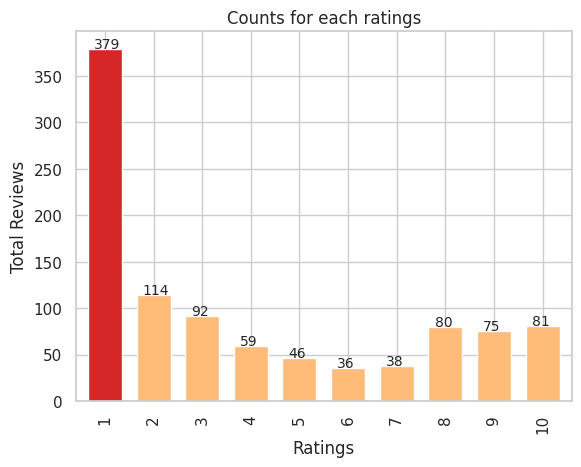

In [ ]:
colors = [cmap[6]] + [cmap[3]] * 9
ax = data['stars'].value_counts().sort_index().plot(kind = 'bar', color=colors, width=0.7)

for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + 0.13, p.get_height() + 1),
              size = 10)

plt.xlabel('Ratings')
plt.ylabel('Total Reviews')
plt.title('Counts for each ratings')
plt.show()

The highest rating is 1. Customer feedback for flights is very poor, with a ratio of ratings of 5 or less at 0.69 and a ratio of ratings above 5 at 0.31.

## Country

In [ ]:
print('They are {} unique countries'.format(data['country'].nunique()))

They are 57 unique countries


In [ ]:
df = data['country'].value_counts()
df

,count
country,
United Kingdom,561
United States,171
Canada,36
Australia,33
South Africa,18
Germany,17
Switzerland,10
Ireland,10
United Arab Emirates,10


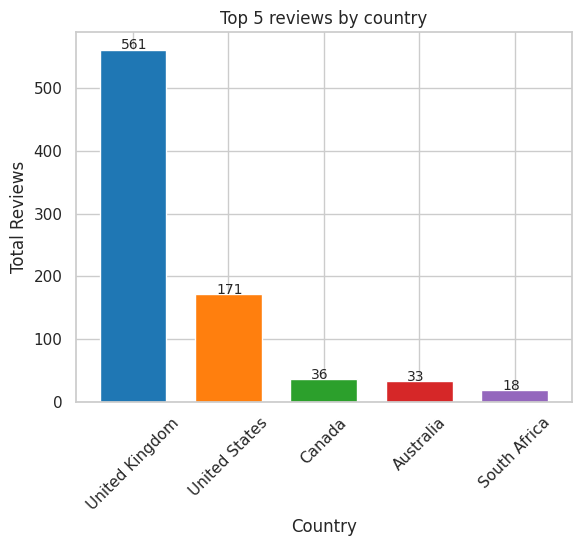

In [ ]:
ax = df[:5].plot(kind = 'bar', color = cmap[0:10:2], width = 0.7)

for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() + 0.22, p.get_height() + 1),
              size = 10)

plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('Total Reviews')
plt.title('Top 5 reviews by country')
plt.show()

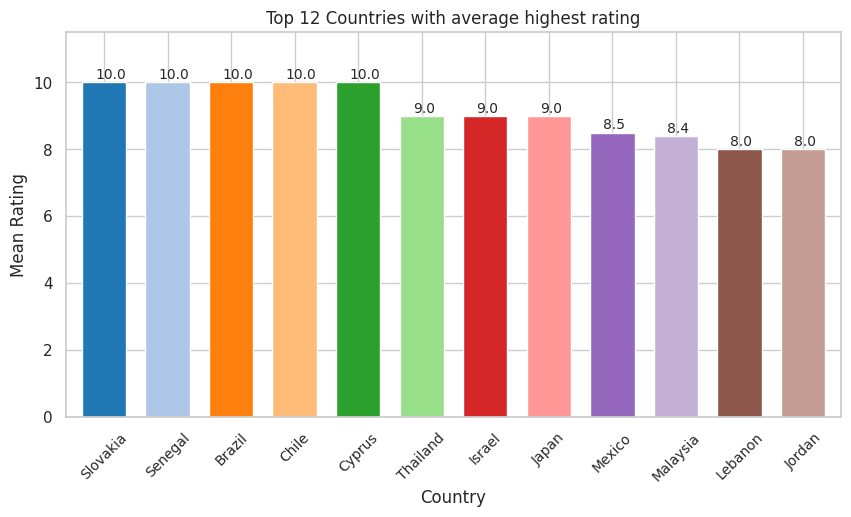

In [ ]:
df = data.groupby('country')['stars'].mean().sort_values(ascending=False)
ax = df[:12].plot(x = 'country', kind = 'bar', color = cmap[:12], width = 0.7,
             figsize = (10, 5), legend = False)
for p in ax.patches:
  value = str(p.get_height())
  x = p.get_x() + p.get_width() * 0.3
  y = p.get_height() + 0.1
  ax.annotate(value, (x,y), size = 10)

plt.xlabel('Country')
plt.ylabel('Mean Rating')
plt.title('Top 12 Countries with average highest rating')
plt.xticks(rotation = 45, fontsize = 10)
plt.ylim(0,11.5)
plt.show()

## Time Series Analysis

<ipython-input-106-41c441c53c13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.to_period('M')


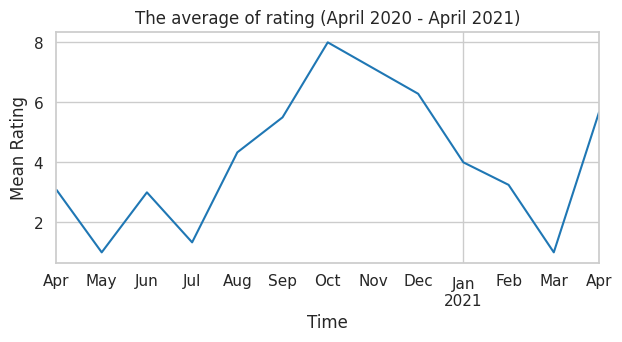

In [ ]:
df = data[['date','stars']]
df['month'] = df['date'].dt.to_period('M')
df = df.groupby('month')['stars'].mean().loc['2020-04':'2021-04']
ax = df.plot(kind='line', figsize = (7,3))
plt.title('The average of rating (April 2020 - April 2021)')
plt.xlabel('Time')
plt.ylabel('Mean Rating')
plt.show()

Between April 2020 and August 2021, there was a decline in reviews. But the review dates do not reflect actual flight dates, making it difficult to infer significant trends from the data.

## Trip Verified

In [ ]:
data['verified'].value_counts()

,count
verified,
True,740
False,260


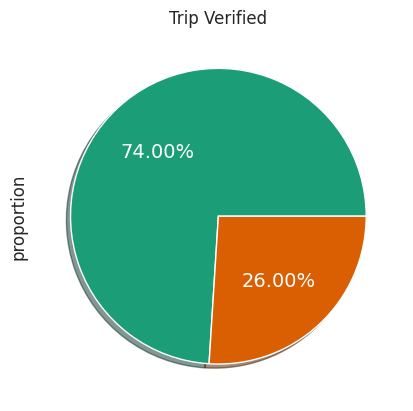

In [ ]:
data['verified'].value_counts(normalize = True).mul(100).round(2).plot(kind = 'pie', autopct = '%1.2f%%', textprops = {'fontsize': 14, 'color':'w'}, shadow = True)
plt.title('Trip Verified')
plt.show()

## Sentiment Analysis

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def SentimentAnalysis(text):
  score = sentiment.polarity_scores(text)
  return score['compound']

data['sentiment'] = data['reviews'].apply(SentimentAnalysis)
data

,reviews,stars,date,country,verified,sentiment
0,bought ticket genevalondon flight got airport ...,1,2024-10-22,Switzerland,False,-0.2500
1,appalling service failing defective fleet a380...,1,2024-10-14,South Africa,True,-0.8807
2,british airway charge pleasure choosing seat p...,6,2024-10-12,United Kingdom,True,0.9725
3,wrong guy people pay lot money business class ...,1,2024-10-12,Germany,True,-0.8644
4,booked two business class seat british airway ...,2,2024-10-12,United States,True,-0.9001
...,...,...,...,...,...,...
995,johannesburg cape town return flight operated ...,8,2019-07-29,Thailand,True,0.9917
996,grenada gatwick flown ba aircraft type prior r...,5,2019-07-28,United Kingdom,True,0.9336
997,prague london two hour flight 27th july delaye...,1,2019-07-27,United Kingdom,True,0.2247
998,london dubai lately frequently flying premium ...,10,2019-07-24,United Arab Emirates,True,0.9182


In [ ]:
data['analysis'] = data['sentiment'].apply(lambda x: 'Positive' if x >= 0.7 else ('Negative' if x < 0.3 else 'Neutral'))
data

,reviews,stars,date,country,verified,sentiment,analysis
0,bought ticket genevalondon flight got airport ...,1,2024-10-22,Switzerland,False,-0.2500,Negative
1,appalling service failing defective fleet a380...,1,2024-10-14,South Africa,True,-0.8807,Negative
2,british airway charge pleasure choosing seat p...,6,2024-10-12,United Kingdom,True,0.9725,Positive
3,wrong guy people pay lot money business class ...,1,2024-10-12,Germany,True,-0.8644,Negative
4,booked two business class seat british airway ...,2,2024-10-12,United States,True,-0.9001,Negative
...,...,...,...,...,...,...,...
995,johannesburg cape town return flight operated ...,8,2019-07-29,Thailand,True,0.9917,Positive
996,grenada gatwick flown ba aircraft type prior r...,5,2019-07-28,United Kingdom,True,0.9336,Positive
997,prague london two hour flight 27th july delaye...,1,2019-07-27,United Kingdom,True,0.2247,Negative
998,london dubai lately frequently flying premium ...,10,2019-07-24,United Arab Emirates,True,0.9182,Positive


In [ ]:
data['analysis'].value_counts()

,count
analysis,
Negative,502
Positive,384
Neutral,114


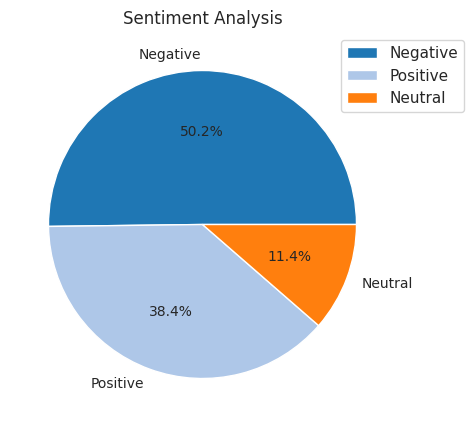

In [ ]:
data['analysis'].value_counts(normalize = True).mul(100).plot(kind = 'pie', labels = ['Negative', 'Positive', 'Neutral'], autopct = '%1.1f%%',
                                                              textprops = {'fontsize': 10}, ylabel = '',figsize=(8, 5), legend = True)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
data.groupby('verified')['analysis'].value_counts().div(1000).mul(100).unstack().T

verified,False,True
analysis,,
Negative,13.2,37.0
Neutral,3.0,8.4
Positive,9.8,28.6


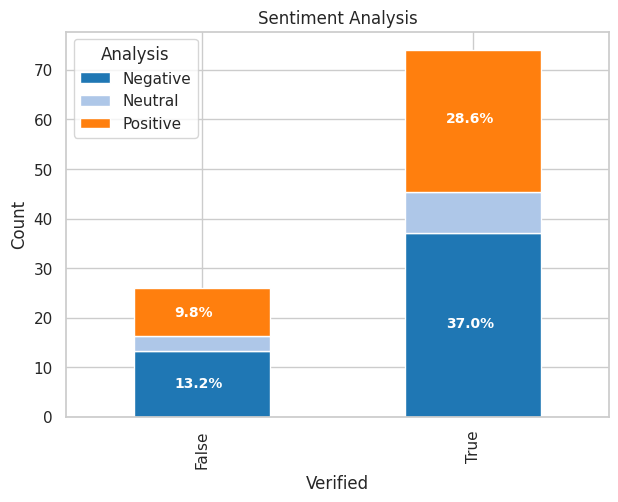

In [ ]:
ax = data.groupby('verified')['analysis'].value_counts().div(1000).mul(100).unstack().plot(kind = 'bar', stacked = True, figsize = (7, 5))
for p in ax.patches:
  if p.get_height() < 9:
    continue
  value = '{:.1f}%'.format(p.get_height())
  x = p.get_x() + p.get_width() * 0.3
  y = np.max([p.get_y() + p.get_height() // 2, p.get_y() + 0.5])
  ax.annotate(value, (x,y), color = 'w', size = 10, weight='bold')

plt.xlabel('Verified')
plt.ylabel('Count')
plt.legend(title = "Analysis")
plt.title('Sentiment Analysis')
plt.show()

The ratio between positive and negative reviews is equal, indicating a balance between good and bad customer experiences. This situation may reflect uncertainty in the quality of service or product, leaving customers feeling both satisfied and dissatisfied.

## Wordcloud

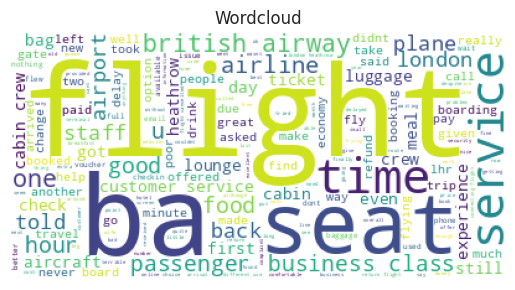

In [ ]:
from wordcloud import WordCloud
text = ' '.join(data['reviews'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud)
plt.title('Wordcloud')
plt.axis('off')
plt.show()